<a href="https://colab.research.google.com/github/revanth6921/Books-Python/blob/main/Yhills_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("/content/h1n1_vaccine_prediction.csv")

In [3]:
df

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [4]:
df.shape

(26707, 34)

In [5]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [6]:
df.isnull()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26703,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26704,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
26705,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.sample(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
18347,18347,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Female,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,1.0,0
867,867,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0
20300,20300,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Black,Female,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,2.0,0
4054,4054,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,White,Female,NaN,Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0
9797,9797,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Principle City",0.0,0.0,1
22535,22535,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"> $75,000",Married,Own,Employed,"MSA, Principle City",3.0,0.0,1
26210,26210,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0
14868,14868,3.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,2.0,0
11289,11289,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",1.0,0.0,0
19504,19504,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Male,NaN,Married,NaN,Employed,"MSA, Not Principle City",1.0,0.0,1


In [8]:
df.sample().sum()

unique_id                                       19593
h1n1_worry                                        1.0
h1n1_awareness                                    1.0
antiviral_medication                              0.0
contact_avoidance                                 1.0
bought_face_mask                                  0.0
wash_hands_frequently                             1.0
avoid_large_gatherings                            0.0
reduced_outside_home_cont                         0.0
avoid_touch_face                                  0.0
dr_recc_h1n1_vacc                                 0.0
dr_recc_seasonal_vacc                             0.0
chronic_medic_condition                           0.0
cont_child_undr_6_mnths                           0.0
is_health_worker                                  0.0
has_health_insur                                  1.0
is_h1n1_vacc_effective                            5.0
is_h1n1_risky                                     2.0
sick_from_h1n1_vacc         

In [9]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [10]:
df.describe(include="all")

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26707,26707,22284,25299,24665,25244,26707,26458.000000,26458.000000,26707.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,2,3,2,2,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21222,15858,12777,13555,18736,13560,11645,NaN,NaN,NaN
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000


In [11]:
df.describe().sum()

unique_id                    114534.791156
h1n1_worry                    26625.528797
h1n1_awareness                26598.880682
antiviral_medication          26637.264389
contact_avoidance             26503.171826
bought_face_mask              26689.322411
wash_hands_frequently         26670.205062
avoid_large_gatherings        26622.838250
reduced_outside_home_cont     26627.810117
avoid_touch_face              26583.144795
dr_recc_h1n1_vacc             24548.634778
dr_recc_seasonal_vacc         24549.799861
chronic_medic_condition       25738.733852
cont_child_undr_6_mnths       25888.357856
is_health_worker              25904.427189
has_health_insur              14438.205020
is_h1n1_vacc_effective        26338.858059
is_h1n1_risky                 26335.628105
sick_from_h1n1_vacc           26328.720435
is_seas_vacc_effective        26269.112551
is_seas_risky                 26211.104217
sick_from_seas_vacc           26186.451062
no_of_adults                  26464.639921
no_of_child

<Axes: xlabel='h1n1_worry', ylabel='count'>

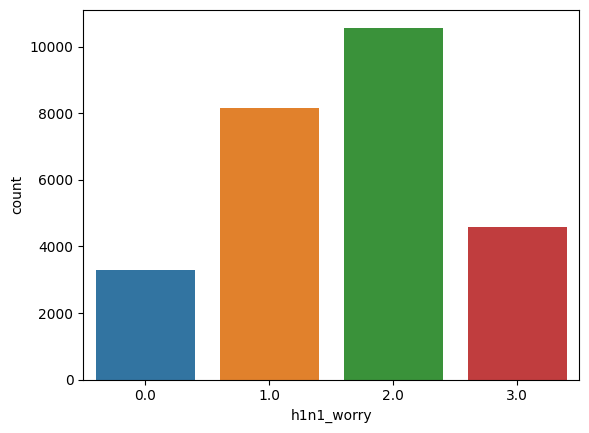

In [12]:
sns.countplot(x="h1n1_worry",data=df)

<Axes: xlabel='h1n1_worry', ylabel='count'>

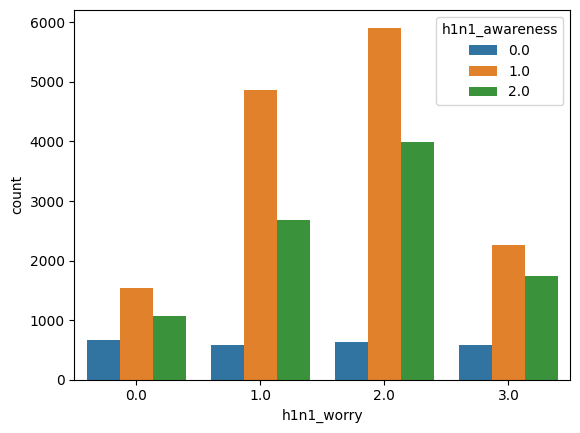

In [13]:
sns.countplot(x="h1n1_worry",hue="h1n1_awareness",data=df)

<Axes: xlabel='income_level', ylabel='count'>

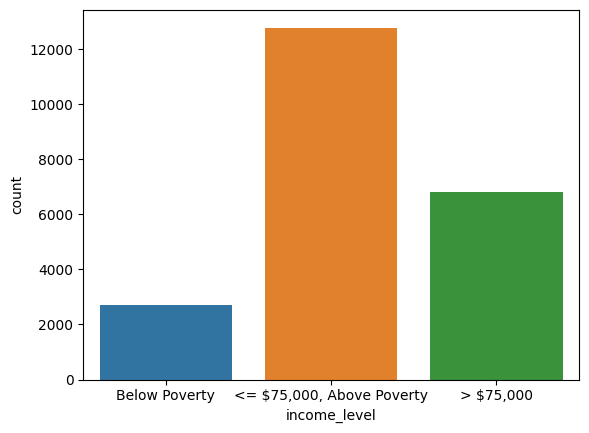

In [14]:
sns.countplot(x="income_level",data=df)

<Axes: xlabel='h1n1_worry'>

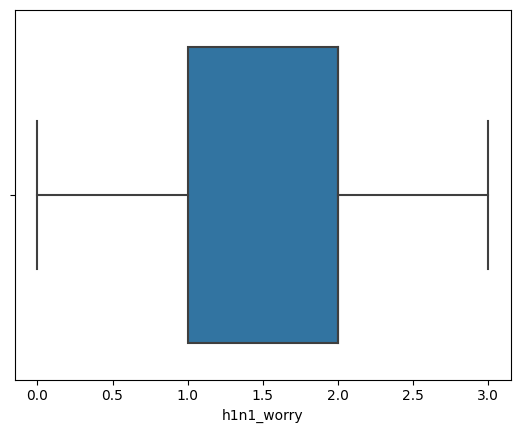

In [15]:
sns.boxplot(x="h1n1_worry",hue="h1n1_awareness",data=df)

In [16]:
X = df.drop("h1n1_vaccine", axis = 1)
y = pd.to_numeric(df["h1n1_vaccine"])

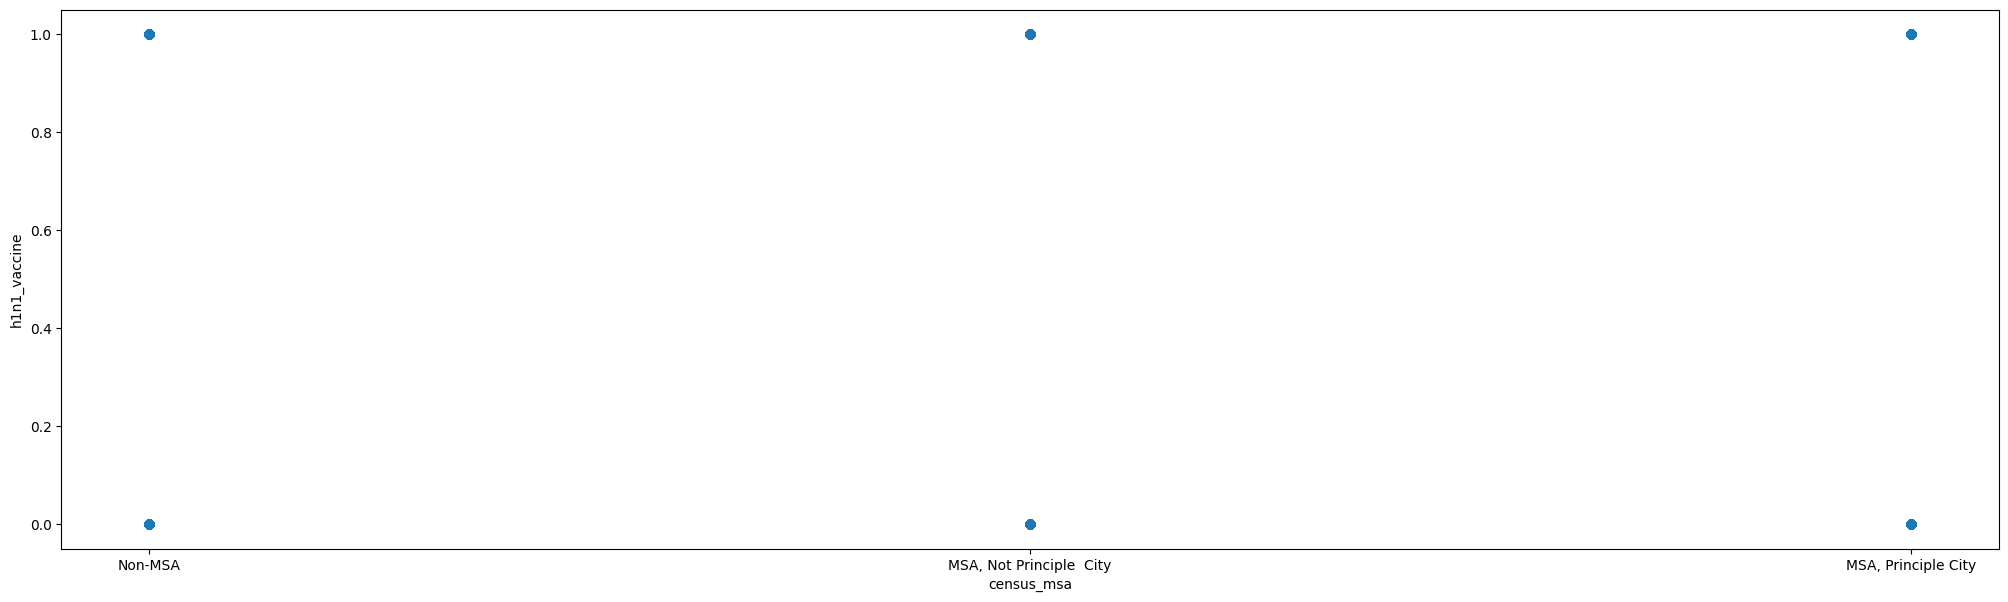

In [17]:
plt.figure(figsize = (25,7))
plt.scatter(X["census_msa"], y)
plt.xlabel('census_msa')
plt.ylabel('h1n1_vaccine')
plt.show()

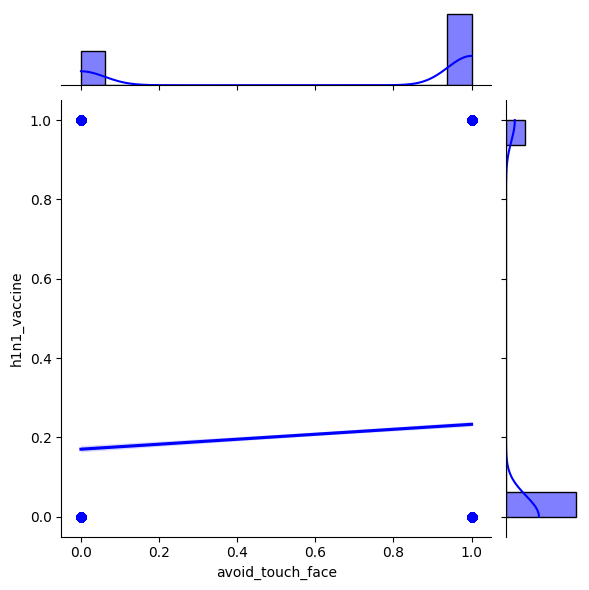

In [18]:
sns.jointplot(x=pd.to_numeric(X["avoid_touch_face"]), y = y, kind="reg",color = 'blue')

<Axes: xlabel='census_msa', ylabel='h1n1_vaccine'>

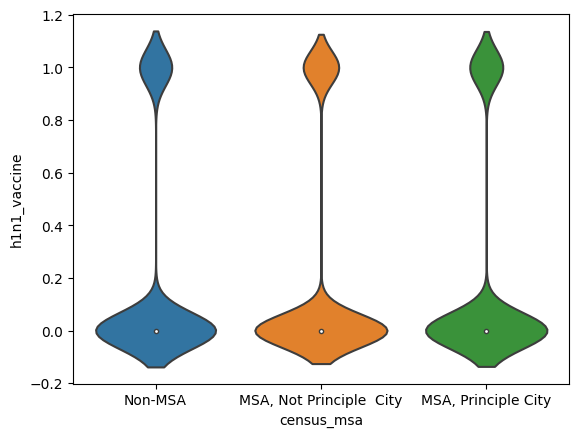

In [19]:
sns.violinplot(x=X["census_msa"],y=y)

In [ ]:
sns.heatmap(corr,annot=True,cmap="YlGnBu")
plt.show()

In [ ]:
sns.pairplot(df,diag_kind="kde")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size =5)

In [ ]:
corr=df.corr()
corr

In [ ]:
df.hist(figsize=(13,10))
plt.show()

In [ ]:
sns.scatterplot(x=pd.to_numeric(X["employment"]), y = y, color = "red")

In [ ]:
sns.swarmplot(x=X["census_msa"],y=y)